In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = "/Users/ziyingwang/Documents/Practicum2024/Data/output_data"
csv_files = glob.glob(os.path.join(path, "*.csv"))
dataframes = []
for file_path in csv_files:
    # Extract the course identifier from the filename (assuming the filename is the course_id)
    course_id = os.path.basename(file_path).replace(".csv", "")
    
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_path)
    
    # Add a new column for the course ID
    df['courses'] = course_id
    
    # Append the dataframe to the list
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)


In [3]:
# Number of people for each courses
count=combined_df['courses'].value_counts()
combined_df.to_csv("combined_courses.csv", index=False)
print(count
    )

SUD            897
Anxiety        377
Covid          182
MOUD           179
C6             155
FROD           142
Narcan         136
Suicide        129
DisTol          92
Youth           82
Leadership      73
AUD             52
Sub 101         17
IPV              5
Name: courses, dtype: int64


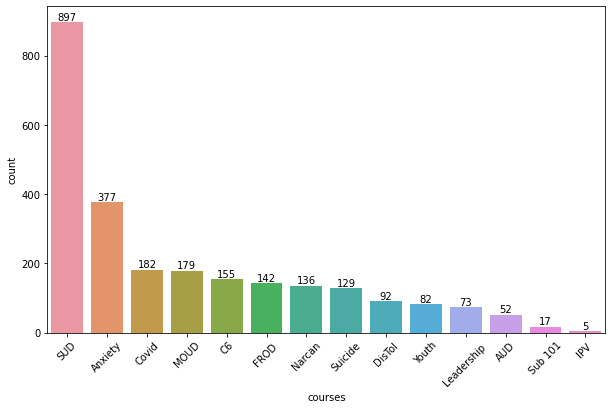

In [4]:
# Number of people for each courses visualization
plt.figure(figsize=(10,6))
l=sns.countplot(x='courses',data= combined_df, 
              order=combined_df['courses'].value_counts().index)
plt.xticks(rotation=45)
l.bar_label(l.containers[0])
plt.show()

In [5]:
from scipy.stats import chi2_contingency

# Chi-square test for age group
age_course= pd.crosstab(combined_df['courses'], combined_df['age'])
chi2, p, dof, ex = chi2_contingency(age_course)
print(f"Chi-Square Test for Age Distribution Across Courses: df={dof}, chi2={chi2}, p={p}")
# Chi-square test for gender
gender_course = pd.crosstab(combined_df['courses'], combined_df['gender'])
chi2, p, dof, ex = chi2_contingency(gender_course)
print(f"Chi-Square Test for Gender Distribution Across Courses: df={dof},chi2={chi2}, p={p}")
# Chi-square test for year_of_experience
experience_course = pd.crosstab(combined_df['courses'], combined_df['year_of_experience'])
chi2, p, dof, ex = chi2_contingency(experience_course)
print(f"Chi-Square Test for year of experience Distribution Across Courses: df={dof}, chi2={chi2}, p={p}")




Chi-Square Test for Age Distribution Across Courses: df=78, chi2=154.17728159295322, p=6.210273955316545e-07
Chi-Square Test for Gender Distribution Across Courses: df=104,chi2=169.46513586874352, p=5.2986633917146556e-05
Chi-Square Test for year of experience Distribution Across Courses: df=39, chi2=196.85117211649265, p=5.931320189746971e-23


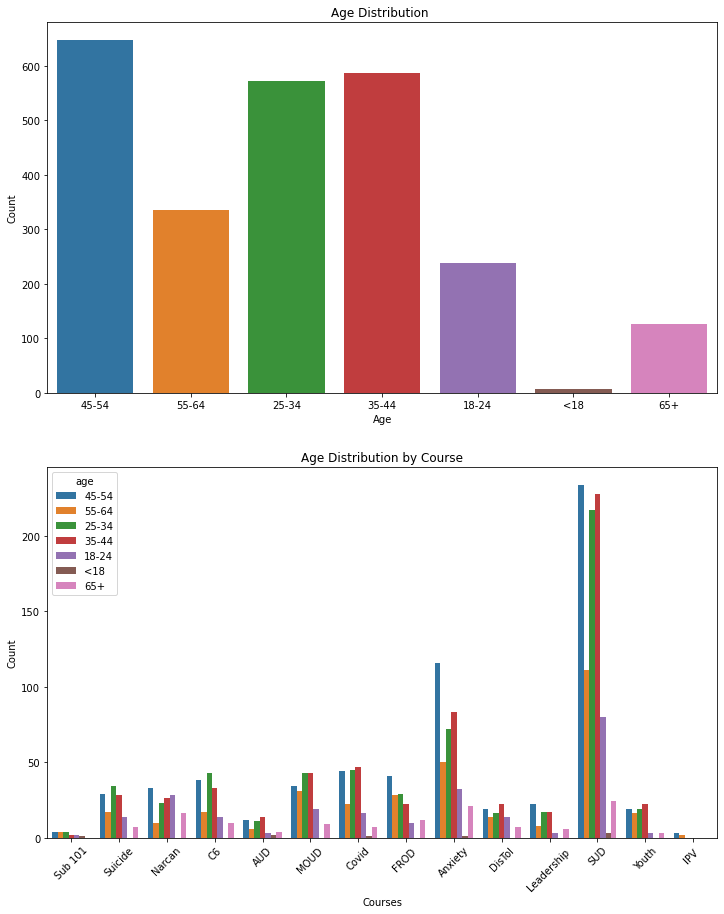

In [11]:
# Age distribution
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,15))
sns.countplot(data=combined_df, x='age', ax=axs[0]) 
axs[0].set_title('Age Distribution ')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

#Age distribution by courses
sns.countplot(data=combined_df, x='courses', hue='age', ax=axs[1])
axs[1].set_title('Age Distribution by Course')
axs[1].set_xlabel('Courses')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
plt.show()

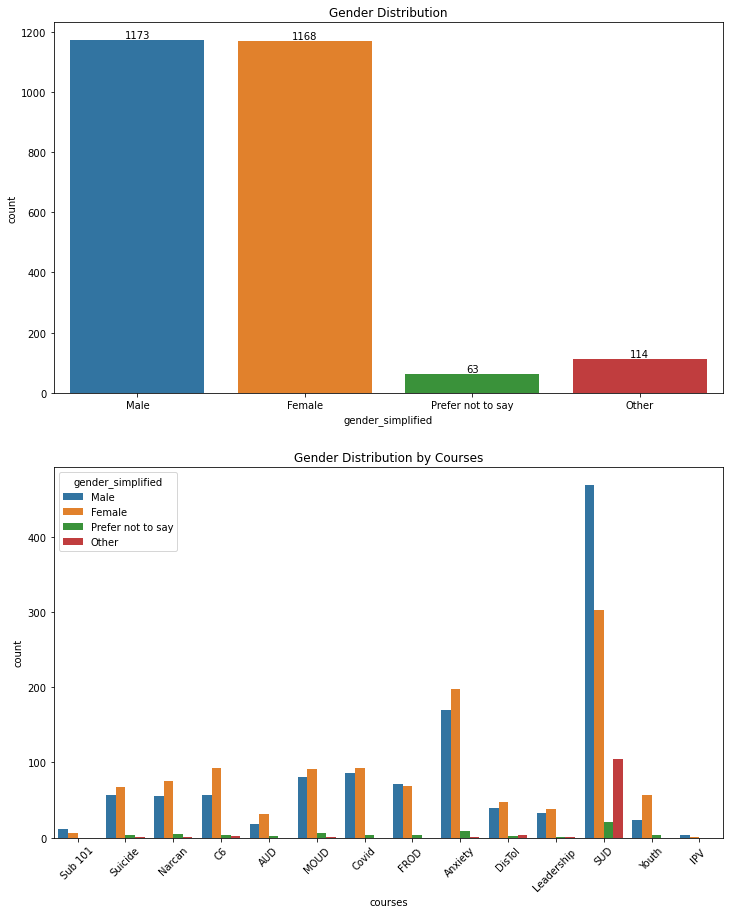

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,15))
# Combine minor categories into a single "Other" category to simplify the graph
combined_df['gender_simplified'] = combined_df['gender'].apply(lambda x: x if x in ['Female', 'Male', 'Prefer not to say'] else 'Other')

# Gender distribution
ax=sns.countplot(data=combined_df, x='gender_simplified',ax=axs[0] )
axs[0].set_title('Gender Distribution')
ax.bar_label(ax.containers[0])

# Gender distribution by courses
sns.countplot(data=combined_df, x='courses', hue='gender_simplified')
axs[1].set_title('Gender Distribution by Courses')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
plt.show()

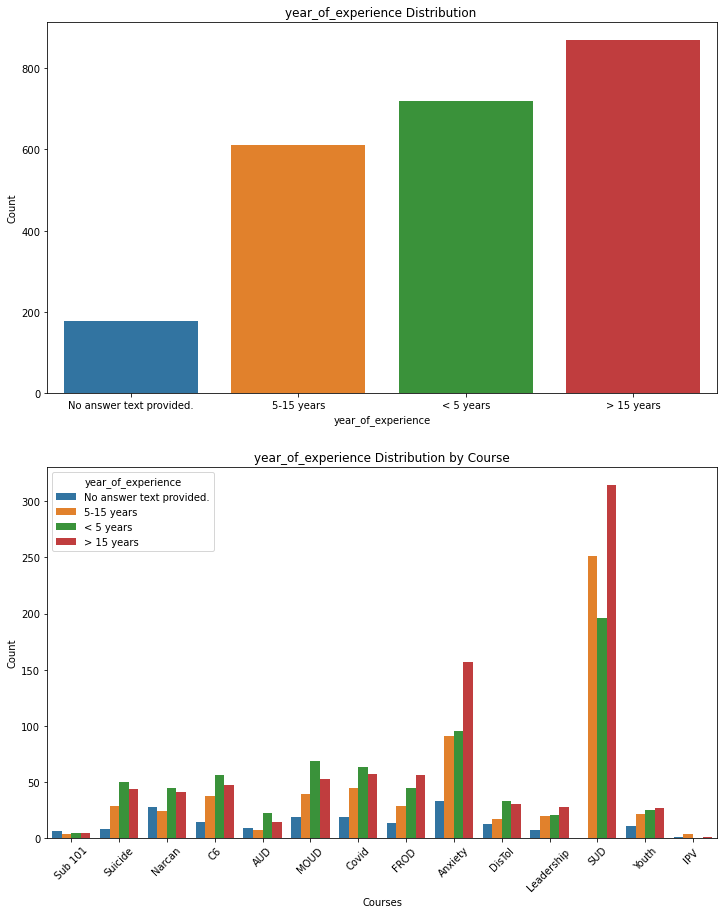

In [12]:
# year_of_experience Distribution
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,15))
sns.countplot(data=combined_df, x='year_of_experience', ax=axs[0] )
axs[0].set_title('year_of_experience Distribution ')
axs[0].set_xlabel('year_of_experience')
axs[0].set_ylabel('Count')

#Age distribution by courses
sns.countplot(data=combined_df, x='courses', hue='year_of_experience', ax=axs[1])
axs[1].set_title('year_of_experience Distribution by Course')
axs[1].set_xlabel('Courses')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
plt.show()

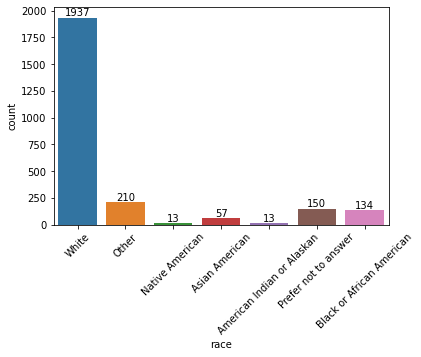

In [30]:
a=sns.countplot(data=combined_df, x='race')
axs[0].set_title('Race Distribution')
a.bar_label(a.containers[0])
plt.xticks(rotation=45)
plt.show()

In [15]:
# Race percentage 
combined_df['race'].value_counts(normalize=True)

White                         0.770485
Other                         0.083532
Prefer not to answer          0.059666
Black or African American     0.053302
Asian American                0.022673
Native American               0.005171
American Indian or Alaskan    0.005171
Name: race, dtype: float64

In [17]:
# Gender counts
combined_df['gender'].value_counts()

Male                              1173
Female                            1168
Prefer not to say                   63
Prefer to self-describe              2
Female,Prefer to self-describe       2
Non-Binary/Third-gender              2
Male,Prefer not to say               2
Female,Male                          1
Male,Prefer to self-describe         1
Name: gender, dtype: int64

In [18]:
# Job type counts
combined_df['job_type'].value_counts()

Paramedic/EMT                 1137
Other                          852
Fire fighter                   365
Dispatcher                      64
Police Officer                  56
Nurse                           18
Allied Health Professional      16
Medical Assistant                7
Name: job_type, dtype: int64

In [19]:
#job status count
combined_df['job_status'].value_counts()

Full-time              1910
Volunteer               303
Part-time               198
Retired or inactive      98
Name: job_status, dtype: int64